In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

%matplotlib inline

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [42]:
data = pd.read_csv("data/train_set.csv", encoding = "ISO-8859-1")

In [43]:
data.shape

(23615, 2)

In [44]:
data.head()

label                                               text
0  85389000                 pdscpm gb part of panel of chiller
1  85389000  nm  p economical extended rot hand parts for c...
2  85389000  lv ma pd trip unit for cvs parts of circuit br...
3  85389000  lv na p trip unit for cvs switch parts of circ...
4  85389000  lv tmd pd trip unit for cvs parts of circuitbr...

In [141]:
data.isnull().sum()

label    0
text     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3f3b0c50>]],
      dtype=object)

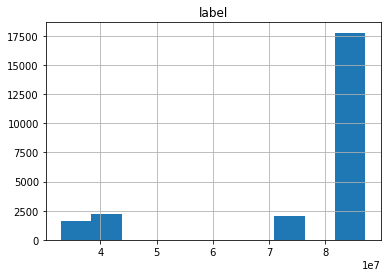

In [57]:
data.hist()

In [59]:
data['label'].value_counts()

85389000    2936
85177090    2581
85369090    2438
39269099    2189
73181500    2033
85366990    1944
85238090    1720
85364900    1714
87089900    1673
33041000    1605
87082900    1451
84713010    1331
Name: label, dtype: int64

<Figure size 1152x864 with 0 Axes>

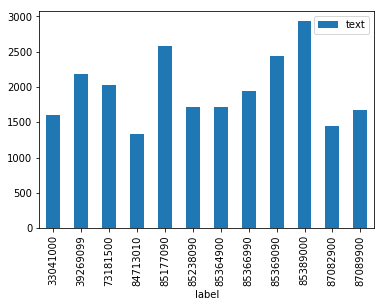

In [115]:
fig = plt.figure(figsize=(16, 12))
data.groupby('label').count().plot.bar(ylim=0)

## Visuazliation

In [67]:
text = ' '.join(data['text'].values)

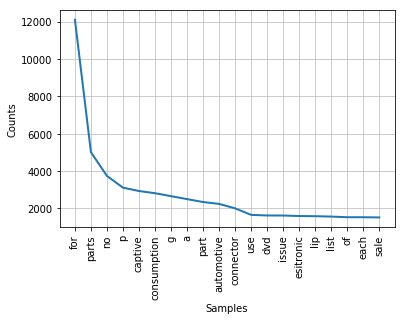

In [68]:
tokens = nltk.word_tokenize(text)
# print(tokens)
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

# Feature Extraction

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, classification_report
from sklearn.model_selection import train_test_split

In [96]:
# one_hot = pd.get_dummies(data['label'])
one_hot = data['label']

In [144]:
text_train, text_val, Y_train, Y_val = train_test_split(data['text'], 
                                                    one_hot, train_size=0.8)
text_train.shape, text_val.shape, Y_train.shape, Y_val.shape

((17711,), (5904,), (17711,), (5904,))

In [98]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2)).fit(text_train)

In [99]:
X_train = vectorizer.transform(text_train)

In [100]:
X_val = vectorizer.transform(text_val)

In [101]:
X_train.shape, X_val.shape

((17711, 39410), (5904, 39410))

## Classify

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
# model = MultinomialNB()
# model = DecisionTreeClassifier()
model = RandomForestClassifier()

In [136]:
model.fit(X_train, Y_train)

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
# Calculate True Positive Rate vs False Positive Rate
predictions = model.predict(X_val)
# score = roc_auc_score(Y_val, predictions)
# score

In [138]:
confusion_matrix(Y_val, predictions)

array([[424,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  2, 473,  11,   2,   8,   0,   1,  25,   6,  14,   8,  15],
       [  0,  13, 450,   0,   2,   0,   0,   6,   2,  10,   8,   4],
       [  0,   1,   0, 306,   0,   0,   0,   1,   0,   1,   1,   0],
       [  0,  16,   3,   0, 607,   0,   0,   0,   1,   5,   0,   0],
       [  0,   1,   0,   0,   0, 405,   0,   2,   0,   2,   0,   0],
       [  0,   1,   0,   0,   0,   0, 419,   1,   3,   1,   0,   1],
       [  0,   4,   3,   1,   1,   0,   0, 428,  20,   6,   0,   1],
       [  0,  13,   3,   0,   3,   0,  15,  38, 537,  10,   1,   2],
       [  0,  32,   4,   2,   1,   1,   1,  24,  25, 688,   2,   2],
       [  0,   4,   0,   0,   0,   0,   0,   1,   0,   1, 334,  22],
       [  0,  17,   4,   0,   0,   0,   2,   6,   1,   4,  16, 361]])

In [140]:
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

    33041000       1.00      1.00      1.00       425
    39269099       0.82      0.84      0.83       565
    73181500       0.94      0.91      0.92       495
    84713010       0.98      0.99      0.99       310
    85177090       0.98      0.96      0.97       632
    85238090       1.00      0.99      0.99       410
    85364900       0.96      0.98      0.97       426
    85366990       0.80      0.92      0.86       464
    85369090       0.90      0.86      0.88       622
    85389000       0.93      0.88      0.90       782
    87082900       0.90      0.92      0.91       362
    87089900       0.88      0.88      0.88       411

    accuracy                           0.92      5904
   macro avg       0.92      0.93      0.93      5904
weighted avg       0.92      0.92      0.92      5904

